# Random Forest

O random forest é um modelo de aprendizado de máquina levemente parecido com o decision tree, a diferença é que este modelo cria várias árvores de decisão, coletando seus resultados e combinando-os, para assim, poder obter uma previsão mais precisa e estável, como no exemplo abaixo.

<center>

![image.png](../figures/random_forest_ex.png)

</center>

## Importando as bibliotecas scikit-learn e o Pandas

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, roc_curve, auc

## Lendo o Dataset tratado, transformando-o em um DataFrame e armazenando nas variáveis, as colunas referentes as suas características e rótulos

In [2]:
df = pd.read_csv('dataset_tratado.csv')

X = df.drop('ZSN', axis=1)  # Armazenando todas as colunas de características, exceto a última pois ela é a coluna de rótulo
y = df['ZSN']               # Armazenado a última coluna, que será o nosso rótulo

## Dividindo os dados em conjunto de treino e teste, além de aplicar e imprimir as suas métricas

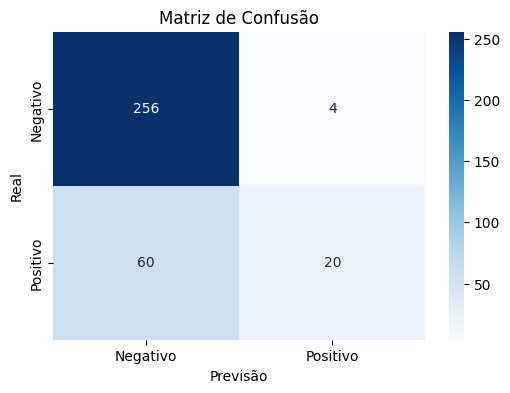

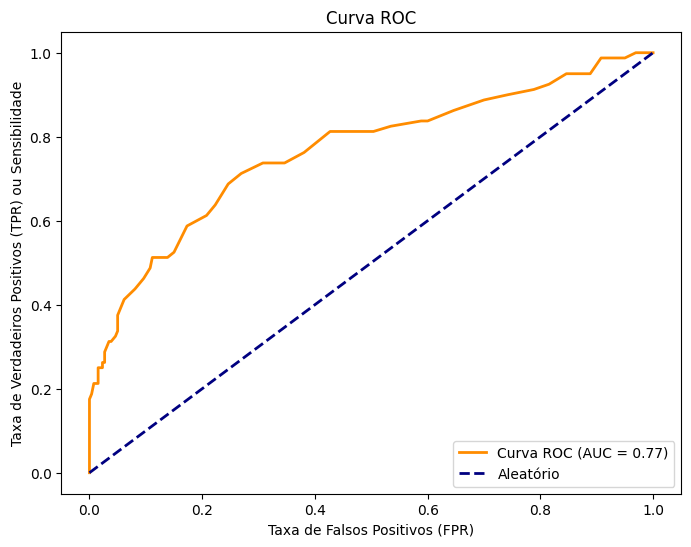

              precision    recall  f1-score   support

           0       0.81      0.98      0.89       260
           1       0.83      0.25      0.38        80

    accuracy                           0.81       340
   macro avg       0.82      0.62      0.64       340
weighted avg       0.82      0.81      0.77       340



In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fazer previsões no conjunto de teste
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_model.fit(X_train, y_train)
y_pred = random_forest_model.predict(X_test)

# Calcular e plotar a matriz de confusão
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negativo', 'Positivo'], yticklabels=['Negativo', 'Positivo'])
plt.xlabel('Previsão')
plt.ylabel('Real')
plt.title('Matriz de Confusão')
plt.show()

# Curva ROC
probs = random_forest_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, probs)
roc_auc = auc(fpr, tpr)

# Plotando a curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Aleatório')
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (TPR) ou Sensibilidade')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()

# Calcular e imprimir as métricas
print(classification_report(y_test, y_pred, digits=2, zero_division=1))
